In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('precision', 5)

In [2]:
wind = pd.read_csv('powerproduction.txt')
wind

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
wind.columns

Index(['speed', 'power'], dtype='object')

In [4]:
wind.shape

(500, 2)

In [5]:
wind.isna().sum()

speed    0
power    0
dtype: int64

In [6]:
wind.isnull().sum()

speed    0
power    0
dtype: int64

In [7]:
wind.describe()

,speed,power
count,500.00000,500.00000
mean,12.59040,48.01458
std,7.22499,41.61457
min,0.00000,0.00000
25%,6.32475,5.28800
50%,12.55050,41.64550
75%,18.77525,93.53700
max,25.00000,113.55600


In [8]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


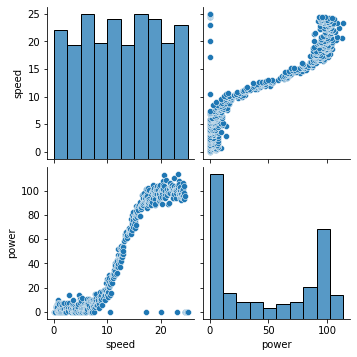

In [9]:
sns.pairplot(wind)

Seems to be some outliers here. I think its reasonable to assume that if the turbine was functioning porperly, there would be power output. So I will assume that these zero values for power, were for times when the turbine was offline due to maintenance or was malfunctioning.

In [10]:
wind = wind[wind['power'] != 0.000]

In [11]:
wind.describe()

,speed,power
count,451.00000,451.00000
mean,13.00430,53.23125
std,6.83598,40.52205
min,0.32500,0.06700
25%,7.34450,8.54350
50%,13.03800,58.16800
75%,18.78150,94.72550
max,24.39900,113.55600


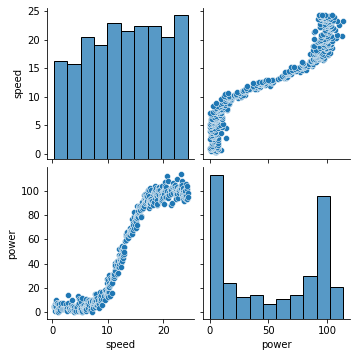

In [12]:
sns.pairplot(wind)

<AxesSubplot:xlabel='speed', ylabel='power'>

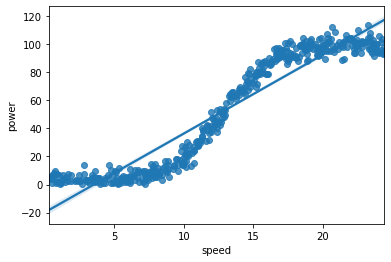

In [13]:
sns.regplot(x="speed", y="power", data=wind)

In [14]:
import sklearn.linear_model as lin

x = wind["speed"].to_numpy()
y = wind["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [15]:
r

0.8984832870534454

In [16]:
p

[-19.837685452108396, 5.618827837778541]

In [17]:
def f(x, p):
    return p[0] + x * p[1]

In [18]:
f(13,p)

53.207076439012646

In [19]:
def predict(x):
    return f(x,p)

In [20]:
predict(13)

53.207076439012646

In [21]:
predict(17.5)

78.49180170901607

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
x = wind["speed"].to_numpy()
y = wind["power"].to_numpy()

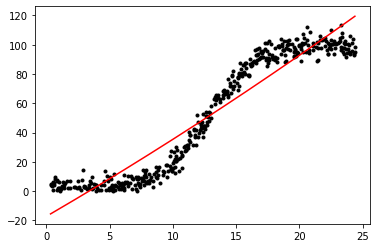

In [45]:
a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'r-')

In [53]:
a, b, c , d = np.polyfit(x, y, 3)

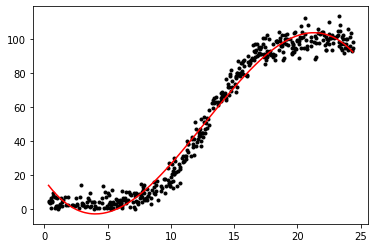

In [54]:
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x *x  +  c * x + d, 'r-')

In [55]:
p

[-19.837685452108396, 5.618827837778541]